In [107]:
import numpy as np
import pandas as pd
import json


data = pd.read_excel('배역배우_v4.xlsx')
kevin_mat = np.identity(len(actors))
actor_list = np.array(list(set(data['배우'].unique())))

test = np.array([
    [1,1,0,0,0],
    [1,1,1,0,0],
    [0,1,1,1,0],
    [0,0,1,1,1],
    [0,0,0,1,1]
])


def kevin_bacon(metrics):
    bacon = metrics.max()
    for i, array in enumerate(metrics):
        if 0 in array:
            target = np.where(array==0)[0]
            assist = np.where(array==1)[0]
            for t in target:
                if bacon in [metrics[t][a] for a in assist]:
                    metrics[i][t] = bacon + 1
                    metrics[t][i] = bacon + 1
    return metrics

def get_bacon(metrics):
    
    counter =0 
    while 0 in metrics or counter > 20:
        metrics = kevin_bacon(metrics)
        counter += 1
    print(counter)
    return metrics

def actor_coord(drama_actors):
    coord_list = []
    for i,_ in enumerate(drama_actors):
        for j in drama_actors[i+1:]:
            actor_1 = actor_to_num(drama_actors[i])
            actor_2 = actor_to_num(j)
            
            coord_list.append((actor_1, actor_2))
            
    return coord_list

def update_mat(coord_list):
    for coord in coord_list:
        i,j = coord
        kevin_mat[i][j] = 1
        kevin_mat[j][i] = 1
    
    return None
        
def actor_to_num(name):
    num = np.where(actor_list == name)[0][0]
    return num


def get_bacon_dict(bacon, actor_list):
    bacon_dict = {}
    length = bacon.shape[0]
    for i, actor in enumerate(actor_list):
        value = bacon[i].sum() / length
        bacon_dict[actor] = value
    return bacon_dict

In [79]:
for title in data['작품명'].unique():
    a = data[data['작품명'] == title]['배우']
    coord_list = actor_coord(list(a))
    update_mat(coord_list)

In [83]:
bacon = get_bacon(kevin_mat)
bacon_dict = get_bacon_dict(bacon, actor_list)

with open('bacon_dict.json','w',encoding='utf-8') as f:
    json.dump(bacon_dict, f, ensure_ascii= False, indent='\t')

0


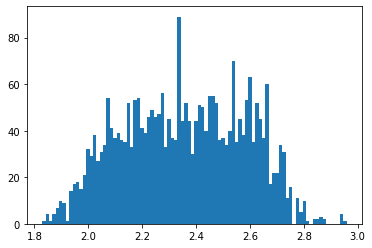

In [160]:
import matplotlib.pyplot as plt
plt.hist(bacon_dict.values(), bins=90)
plt.show()

In [213]:
l = []
for n in ['안보현','신성록','이세영']:
    print(n, ': ', bacon_dict[n])
    l.append(bacon_dict[n])

안보현 :  2.2335307179866764
신성록 :  2.027017024426351
이세영 :  2.0780903034789047


In [214]:
10 / sum(l)

1.5776259706895543